In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install python-igraph
!pip install cairocffi
!pip install snap-stanford
!pip install berserk-downstream
!pip install rich

     |████████████████████████████████| 3.1 MB 6.9 MB/s 
     |████████████████████████████████| 88 kB 4.4 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=d816f06ca761395101ad9df0976bac7d0f2943ff36cb0b2979fd11e8fd37c4b2
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi
     |████████████████████████████████| 11.6 MB 6.2 MB/s 
     |████████████████████████████████| 217 kB 7.2 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 


In [ ]:
#!pip install neo4j

In [ ]:
import numpy as np
import pandas as pd
import random
import math
import scipy as sp
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import re
import requests 
import time
import sys
import glob
import json
import joblib
from rich.jupyter import print
from tqdm import tqdm

In [ ]:
import snap
import seaborn as sns
sns.set(style="white")

In [ ]:
import chess

In [ ]:
!pip uninstall python-chess

Found existing installation: python-chess 0.23.11
Uninstalling python-chess-0.23.11:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/chess/*
    /usr/local/lib/python3.7/dist-packages/python_chess-0.23.11.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled python-chess-0.23.11


In [ ]:
!pip install chess

     |████████████████████████████████| 147 kB 13.5 MB/s 


In [ ]:
!pip install chess.pgn

In [ ]:
import chess

In [ ]:
import chess.pgn

In [ ]:
#import chess.pgn
!pip install pgn2data

  Created wheel for pgn2data: filename=pgn2data-0.0.4-py3-none-any.whl size=13807 sha256=1b2e5e30cae7d5e81d7a2f414973fee691523d33b078593b74b5739f0f93bbf3
  Stored in directory: /root/.cache/pip/wheels/92/56/9b/24d50600bca9b075d0913da30e06e70c1ea6351af2c523a27d
Successfully built pgn2data


In [ ]:
from converter.pgn_data import PGNData

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
#import dask

In [ ]:
#!pip install rapidsai

In [ ]:
#!pip install dask.dataframe

In [ ]:
#from dask.dataframe import from_pandas

In [ ]:
#import berserk

#session = berserk.TokenSession(API_TOKEN)
#client = berserk.Client(session=session)

### Data Loading

In [ ]:
class Match:
    def __init__(self, game):
        self.game = game
        self.game_id = game.headers.get('Site').split('/')[-1]
        self.moves = self.get_moves()
        self.tracker = game.board().piece_map()
        self.start_tracker()
        self.black_elo = game.headers.get('BlackElo')
        self.white_elo = game.headers.get('WhiteElo')
    @staticmethod 
    def castling_move_rook(from_square, to_square):
        if from_square == 4:
            if to_square == 6:
                return {'piece':7, 'move':(7,5)}
            elif to_square == 2:
                return {'piece':0, 'move':(0,3)}
        elif from_square == 60:
            if to_square == 62:
                return {'piece':63, 'move':(63,61)}
            elif to_square == 58:
                return {'piece':56, 'move':(56,59)}
    
    def get_moves(self):
        moves = []
        for move in self.game.mainline_moves():
            from_m = move.from_square
            to_m = move.to_square
            moves.append((from_m, to_m))
        return moves
    
    @staticmethod
    def _to_uci(square):
        square = int(square)
        letter = chr(ord('a') + ((square)%8)) 
        number = square//8+1
        return f"{letter}{number}"
    
    def start_tracker(self):
        for key in self.tracker.keys():
            self.tracker[key] = {'piece': self.tracker[key].unicode_symbol()+'-'+str(self._to_uci(key)),\
                                 'moves':[], 'last_square':key,'captured':False, 'captures':[]}
        
    def fill_tracker(self):
        for mov in self.moves:
            from_m, to_m = mov
            piece = [key for (key,value) in self.tracker.items() if value.get('last_square') == from_m and value.get('captured') is False][0]
            captured = [key for (key,value) in self.tracker.items() if value.get('last_square') == to_m and value.get('captured') is False]
            if len(captured) > 0:
                captured = captured[0]
                self.tracker[captured]['captured'] = True
                self.tracker[piece]['captures'].append(self.tracker[captured].get('piece'))
            self.tracker[piece]['moves'].append(to_m)
            if piece in [4,60] and abs(from_m - to_m) == 2:
                castled = self.castling_move_rook(from_m,to_m)
                self.tracker[castled['piece']]['moves'].append(castled['move'][1])
                self.tracker[castled['piece']]['last_square'] = castled['move'][1]
            self.tracker[piece]['last_square'] = to_m
            
    def get_mean_elo(self):
        try:
            mean = (int(self.black_elo) + int(self.white_elo))/2
            return mean
        except:
            return np.nan
        
    def get_dataframe(self):
        df = pd.DataFrame.from_dict(self.tracker, orient='index')
        df['game_id'] = self.game_id
        df['mean_elo'] = self.get_mean_elo()
        
        return df

In [ ]:
from chess import *

In [ ]:
pgn_file = "/content/drive/MyDrive/LICHESS_PROJ/lichess_db_standard_rated_2013-02.pgn"

In [ ]:
df_games = []
with open(pgn_file) as pgnpp:

  for i in tqdm(range(40000)):
    game = chess.pgn.read_game(pgnpp)
    m = Match(game)
    #print(f"{i} - {m.game_id}")
    m.fill_tracker()
    df_games.append(m.get_dataframe())

In [ ]:
#df_FEB13 = pd.concat(df_games)

In [ ]:
#df_FEB13

In [ ]:
#df_FEB13.to_csv('/content/drive/MyDrive/LICHESS_PROJ/df_FEB13.csv')

# Data preprocessing and preparation

In [ ]:
#df_FEB13_ana = pd.read_csv('/content/drive/MyDrive/LICHESS_PROJ/Feb_13_analysis.csv')

In [ ]:
#df_FEB13_ana

In [ ]:
df_FEB13 = pd.read_csv('/content/df_FEB13.csv')

In [ ]:
#path = '/content/drive/MyDrive/LICHESS_PROJ/df_FEB13.csv'
#df_FEB13 = pd.read_csv(path)

In [ ]:
df_FEB13.dtypes

Unnamed: 0       int64
piece           object
moves           object
last_square      int64
captured          bool
captures        object
game_id         object
mean_elo       float64
dtype: object

In [ ]:
df_FEB13['piece_type'] = df_FEB13['piece'].str.split('-').str.get(0)

In [ ]:
df_FEB13.dropna(how='all')
df_FEB13.reset_index(drop=True)
df_FEB13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140337 entries, 0 to 140336
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   140337 non-null  int64  
 1   piece        140337 non-null  object 
 2   moves        140337 non-null  object 
 3   last_square  140337 non-null  int64  
 4   captured     140337 non-null  bool   
 5   captures     140337 non-null  object 
 6   game_id      140337 non-null  object 
 7   mean_elo     140016 non-null  float64
 8   piece_type   140337 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 8.7+ MB


In [ ]:
pieces = pd.DataFrame({'piece_type':df_FEB13['piece'].str.split('-').str.get(0).unique(), 'piece_name':['Rook','Knight','Bishop','King','Queen','Pawn','Pawn','Rook','Knight','Bishop','King','Queen']})


In [ ]:
# merge to df
df_FEB13 = df_FEB13.merge(pieces, on='piece_type')



In [ ]:
# Parse number of moves and number of captures
df_FEB13['num_moves'] = df_FEB13['moves'].apply(len)
df_FEB13['num_captures'] = df_FEB13['captures'].apply(len)


In [ ]:
# Parse piece colour
df_FEB13['colour'] = 'white'
df_FEB13.loc[df_FEB13['piece'].str.contains('7|8'), 'colour'] = 'black'

In [ ]:
print(df_FEB13)

Unnamed: 0 piece  ... num_captures  colour
0               63  ♜-h8  ...            2   black
1               56  ♜-a8  ...            2   black
2               63  ♜-h8  ...            2   black
3               56  ♜-a8  ...            2   black
4               63  ♜-h8  ...            2   black
...            ...   ...  ...          ...     ...
140332           3  ♕-d1  ...            8   white
140333           3  ♕-d1  ...            8   white
140334           3  ♕-d1  ...            2   white
140335           3  ♕-d1  ...           40   white
140336           3  ♕-d1  ...           16   white

[140337 rows x 13 columns]

In [ ]:
#Average moves of each piece
ave_moves = df_FEB13.groupby(['piece','piece_name','colour'])['num_moves'].mean().reset_index()

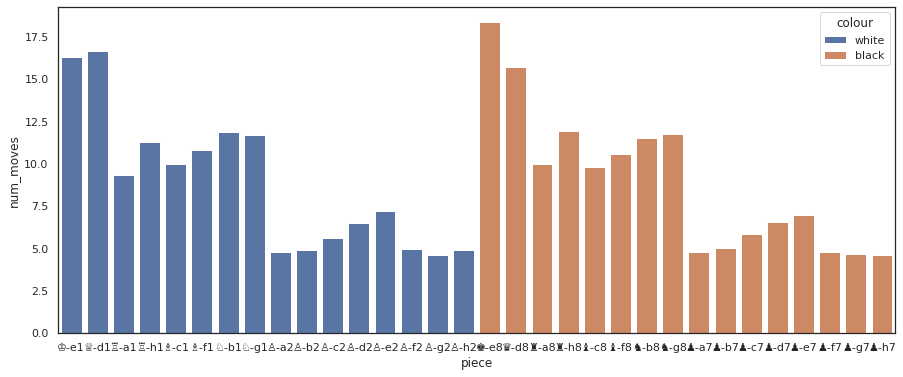

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=ave_moves, x='piece', hue='colour', y='num_moves', dodge=False)

In [ ]:
# Average of capturaing rate for each piece
ave_captured = df_FEB13.groupby(['piece','piece_name','colour'])['num_captures'].mean().reset_index()

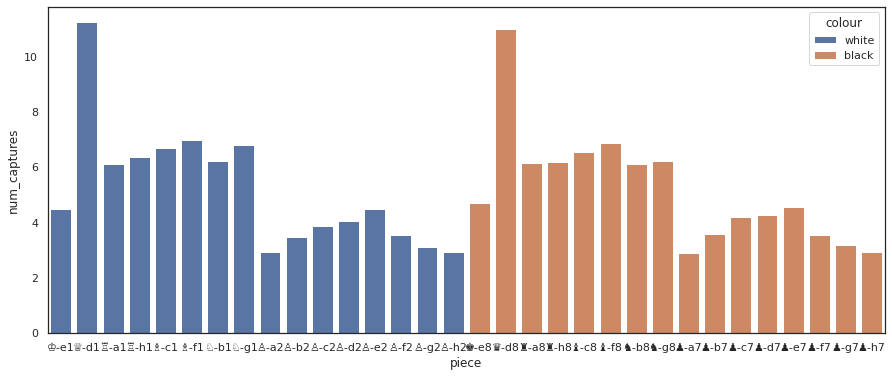

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=ave_captured, x='piece', hue='colour', y='num_captures', dodge=False)

In [ ]:
## Save the relevant data to insert into Neo4j
captures_df = (df_FEB13.explode('captures').groupby(['piece','captures'])['game_id'].nunique() /df_FEB13['game_id'].nunique()).to_frame().reset_index()\
.sort_values('game_id', ascending=False)\
.assign(piece_type = lambda df: df['piece'].str.split('-').str.get(0))
#captures_df.to_pickle('/content/drive/MyDrive/LICHESS_PROJ/feb13_captures_df.pkl')



In [ ]:
captures_df = pd.read_pickle("/content/feb13_captures_df_n.pkl") 

In [ ]:
captures_df.drop("game_id", axis=1, inplace=True)

In [ ]:
captures_df

piece captures piece_type
27   ♕-d1     ♛-d8          ♕
298  ♛-d8     ♕-d1          ♛
222  ♙-e2     ♟-d7          ♙
84   ♗-c1     ♝-f8          ♗
375  ♝-f8     ♗-c1          ♝
..    ...      ...        ...
386  ♝-f8     ♟-a7          ♝
389  ♝-f8     ♟-g7          ♝
405  ♞-b8     ♟-b7          ♞
429  ♞-g8     ♟-g7          ♞
0    ♔-e1     ♙-b2          ♔

[564 rows x 3 columns]

In [ ]:
from subprocess import check_output

In [ ]:
g = nx.Graph()

In [ ]:
g = nx.from_pandas_edgelist(captures_df, source = 'piece', target = 'captures')

In [ ]:
print(nx.info(g))

Graph with 32 nodes and 332 edges

In [ ]:
plt.figure(figsize = (42,39))
nx.draw_networkx(g, with_labels=True, node_size = 94)
plt.show()

In [ ]:
nodeColorz = [i*.2+0.01 for i in range(32)]

In [ ]:
Colorz1 = ['r', 'b']*16
Colorz2 = ['g', 'violet']*16

In [ ]:
len(nodeColorz)

32

In [ ]:
plt.figure(figsize = (42,39))
nx.draw_networkx(g, pos=nx.spring_layout(g), with_labels=True, node_size = 180, cmap = 'plasma', node_color = Colorz1, edge_color = 'g', edge_cmap = 'plasma', font_size =55)
plt.show()

In [ ]:
plt.figure(figsize = (42,39))
pos = nx.circular_layout(g)
nx.draw_networkx(g, pos, with_labels=True, node_size = 180, cmap = 'plasma', node_color = Colorz1, edge_color = 'g', edge_cmap = 'plasma', font_size =55)
plt.show()

In [ ]:
plt.figure(figsize = (42,39))
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos, with_labels=True, node_size = 180, cmap = 'plasma', node_color = Colorz1, edge_color = 'g', edge_cmap = 'plasma', font_size =55)
plt.show()

In [ ]:
plt.figure(figsize = (42,39))
pos = nx.shell_layout(g)
nx.draw_networkx(g, pos, with_labels=True, node_size = 180, cmap = 'plasma', node_color = Colorz1, edge_color = 'g', edge_cmap = 'plasma', font_size =55)
plt.show()

In [ ]:
plt.figure(figsize = (42,39))
pos = nx.planar_layout(g)
nx.draw_networkx(g, pos, with_labels=True, node_size = 180, cmap = 'plasma', node_color = Colorz1, edge_color = 'g', edge_cmap = 'plasma', font_size =55)
plt.show()

In [ ]:
plt.figure(figsize = (42,39))
nx.draw_networkx(g, pos=nx.spring_layout(g))
plt.show()

In [ ]:
def visualize(labels, g):
    pos = nx.spring_layout(g, seed=1)
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    nx.draw_networkx(g, pos=pos, node_size=50, cmap=plt.get_cmap('coolwarm'),
                     node_color=labels, edge_color='k',
                     arrows=False, width=0.5, style='dotted', with_labels=False)

In [ ]:
 visualize(pieces, g)

In [ ]:
plot_reaction_network(pieces,captures_df)

## Net Analysis

In [ ]:
centralMeasures = pd.DataFrame(nx.degree_centrality(g),index=[0]).T
centralMeasures.columns=['Degree Centrality']
centralMeasures['Page Rank']= pd.DataFrame(nx.pagerank(g),index=[0]).T
centralMeasures['Name']= centralMeasures.index.tolist()
centralMeasures.index = np.arange(0,len(centralMeasures))
centralMeasures

Degree Centrality  Page Rank  Name
0            0.677419   0.031468  ♕-d1
1            0.677419   0.031557  ♛-d8
2            0.612903   0.028948  ♙-e2
3            0.774194   0.035481  ♟-d7
4            0.580645   0.027636  ♗-c1
5            0.612903   0.029035  ♝-f8
6            0.516129   0.025098  ♗-f1
7            0.612903   0.029017  ♝-c8
8            0.677419   0.031566  ♞-g8
9            0.677419   0.031557  ♞-b8
10           0.612903   0.028914  ♘-g1
11           0.645161   0.030209  ♘-b1
12           0.741935   0.034187  ♟-c7
13           0.709677   0.032820  ♙-d2
14           0.741935   0.034167  ♟-e7
15           0.580645   0.027646  ♖-a1
16           0.580645   0.027814  ♜-a8
17           0.645161   0.030212  ♖-h1
18           0.645161   0.030331  ♜-h8
19           0.806452   0.036726  ♙-c2
20           0.709677   0.032847  ♙-b2
21           0.741935   0.034200  ♟-b7
22           0.838710   0.038067  ♟-f7
23           0.709677   0.032937  ♟-g7
24           0.806452   0.036741  ♙-f2
25           0.548387   0.026417  ♙-a2
26           0.612903   0.029142  ♟-a7
27           0.645161   0.030235  ♙-g2
28           0.612903   0.028984  ♙-h2
29           0.645161   0.030395  ♟-h7
30           0.709677   0.032854  ♚-e8
31           0.709677   0.032790  ♔-e1

/usr/local/lib/python3.7/dist-packages/igraph/drawing/__init__.py:270: UserWarning: Graph with 32 nodes and 332 edges does not support plotting
  warn("%s does not support plotting" % (obj,))


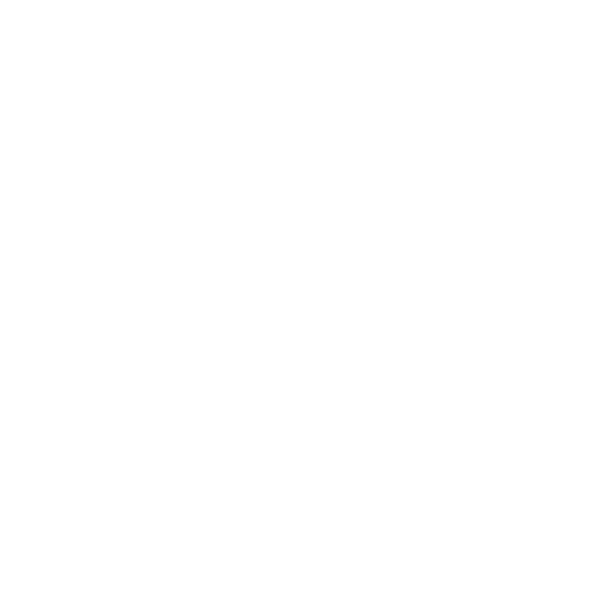

In [ ]:
ig.plot(g)

In [ ]:
g_inv = nx.Graph()
g_inv  = nx.from_pandas_edgelist(captures_df, source = 'captures', target = 'piece')
print(nx.info(g_inv))

Graph with 32 nodes and 332 edges

In [ ]:
plt.figure(figsize = (42,39))
pos_inv = nx.circular_layout(g_inv)
nx.draw_networkx(g_inv, pos_inv, with_labels=True)

plt.show()

/usr/local/lib/python3.7/dist-packages/igraph/drawing/__init__.py:270: UserWarning: Graph with 32 nodes and 332 edges does not support plotting
  warn("%s does not support plotting" % (obj,))


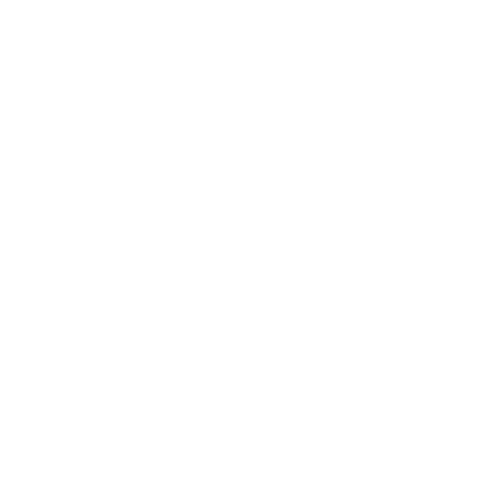

In [ ]:
#dict of X11 color names 
colors = ig.drawing.colors.known_colors
colors = list(colors.keys())
#set label to be names of nx graph nodes
#g.vs["label"] = g.vs["piece"]

visual_style = {}
#node size
visual_style["vertex_size"] = 20
#node color
#visual_style["vertex_color"] =  random.sample(colors,len(g.vs()))
#node label
#visual_style["vertex_label"] = g.vs["label"]
#node label color
visual_style["vertex_label_color"] = "black"
#node label size
visual_style["vertex_label_size"] = [3*degree for degree in g.degree()]
#edge thickness
#visual_style["edge_width"] = [0.14 * int(weight) for weight in g.es["weight"]]
#bounding box
visual_style["bbox"] = (500, 500)
#margin
visual_style["margin"] = 20

ig.plot(g, **visual_style)

In [ ]:
Colorz3 = ['r', 'b']*1872


In [ ]:
captures_df = (df_FEB13.explode('captures').groupby(['piece','captures'])['game_id'].nunique() /df_FEB13['game_id'].nunique()).to_frame().reset_index().sort_values('game_id', ascending=False).assign(piece_type = lambda df: df['piece'].str.split('-').str.get(0))

In [ ]:
g1 = nx.Graph()
g1 = nx.from_pandas_edgelist(captures_df, source = 'piece', target = 'captures')
pos1 = nx.kamada_kawai_layout(g1)
print(nx.info(g1))
plt.figure(figsize = (99,89))
nx.draw_networkx(g1, pos1, with_labels=True, node_size = 180, cmap = 'plasma', node_color = 'r', edge_color = 'g', edge_cmap = 'plasma', font_size =15)
plt.show()

Graph with 3744 nodes and 7163 edges

In [ ]:
g1 = nx.Graph()
g1 = nx.from_pandas_edgelist(captures_df, source = 'piece', target = 'captures')
plt.figure(figsize = (65,52))
nx.draw_networkx(g1, with_labels=True, node_size = 94)
plt.show()

In [ ]:
g1 = nx.Graph()
g1 = nx.from_pandas_edgelist(captures_df, source = 'piece', target = 'captures')
plt.figure(figsize = (65,52))
nx.draw_networkx(g1, pos=nx.kamada_kawai_layout(g1))
plt.show()

In [ ]:
g1 = nx.Graph()
g1 = nx.from_pandas_edgelist(captures_df, source = 'piece', target = 'captures')
print(nx.info(g1))
plt.figure(figsize = (99,89))
nx.draw_networkx(g1, pos=nx.spring_layout(g1),with_labels=True, node_size = 150, cmap = 'plasma', node_color = Colorz3, edge_color = 'g', edge_cmap = 'plasma', font_size =12)
plt.show()

In [ ]:
centralMeasures_w = pd.DataFrame(nx.degree_centrality(g1),index=[0]).T
centralMeasures_w.columns=['Degree Centrality']
centralMeasures_w['Page Rank']= pd.DataFrame(nx.pagerank(g1),index=[0]).T
centralMeasures_w['Name']= centralMeasures_w.index.tolist()
centralMeasures_w.index = np.arange(0,len(centralMeasures_w))
centralMeasures_w

Degree Centrality  Page Rank                                      Name
0              0.012824   0.002462                                      ♟-a7
1              0.008549   0.001595                                        []
2              0.014694   0.002794                                      ♙-a2
3              0.013625   0.002521                                      ♟-h7
4              0.011488   0.002162                                      ♙-h2
...                 ...        ...                                       ...
3739           0.000267   0.000093          ['♜-a8', '♜-h8', '♟-e7', '♟-f7']
3740           0.000267   0.000093  ['♜-a8', '♜-h8', '♟-a7', '♞-g8', '♟-f7']
3741           0.000267   0.000093          ['♛-d8', '♟-g7', '♙-c2', '♟-b7']
3742           0.000267   0.000093  ['♛-d8', '♟-e7', '♞-b8', '♟-a7', '♟-g7']
3743           0.000267   0.000093  ['♕-d1', '♗-c1', '♘-b1', '♖-h1', '♙-d2']

[3744 rows x 3 columns]

In [ ]:
captures_df.pivot(index='piece', columns='captures', values='game_id').iloc[:5,13:]

In [ ]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(captures_df.pivot(index='piece', columns='captures', values='game_id').iloc[:16,15:],annot=True, fmt=".1%", cbar=False, cmap='Wistia')
ax.set_title('Percentage of games where piece was captured\nWhite captures Black')
ax.set_ylabel('Capturing Piece')
ax.set_xlabel('Captured Piece')
plt.savefig('white_captures_black_heatmap.png')

In [ ]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(captures_df.pivot(index='piece', columns='captures', values='game_id').iloc[16:,:15],annot=True, fmt=".1%", cbar=False, cmap='Wistia')
ax.set_title('Percentage of games where piece was captured\nBlack captures White')
ax.set_ylabel('Capturing Piece')
ax.set_xlabel('Captured Piece')
plt.savefig('black_captures_white_heatmap.png')

In [ ]:
captures_df = pd.read_pickle("/content/feb13_captures_df_n.pkl") 

In [ ]:
captures_df = captures_df.assign(capture_type = lambda df: df['captures'].str.split('-').str.get(0))

In [ ]:
captures_df = captures_df.rename(columns={'game_id':'pct_of_games'})

In [ ]:
captures_df

piece captures  pct_of_games piece_type capture_type
27   ♕-d1     ♛-d8      0.229550          ♕            ♛
298  ♛-d8     ♕-d1      0.216725          ♛            ♕
222  ♙-e2     ♟-d7      0.190675          ♙            ♟
84   ♗-c1     ♝-f8      0.182175          ♗            ♝
375  ♝-f8     ♗-c1      0.181300          ♝            ♗
..    ...      ...           ...        ...          ...
386  ♝-f8     ♟-a7      0.000025          ♝            ♟
389  ♝-f8     ♟-g7      0.000025          ♝            ♟
405  ♞-b8     ♟-b7      0.000025          ♞            ♟
429  ♞-g8     ♟-g7      0.000025          ♞            ♟
0    ♔-e1     ♙-b2      0.000025          ♔            ♙

[564 rows x 5 columns]

In [ ]:
captures_df = captures_df.rename(columns={'piece_name_x':'piece_name', 'piece_name_y':'capture_name','piece_type_x':'piece_type'})

In [ ]:
captures_df = captures_df.merge(pieces, on='piece_type').merge(pieces, left_on='capture_type', right_on='piece_type')

NameError: ignored

In [ ]:
captures_df

piece captures  pct_of_games piece_type capture_type
27   ♕-d1     ♛-d8      0.229550          ♕            ♛
298  ♛-d8     ♕-d1      0.216725          ♛            ♕
222  ♙-e2     ♟-d7      0.190675          ♙            ♟
84   ♗-c1     ♝-f8      0.182175          ♗            ♝
375  ♝-f8     ♗-c1      0.181300          ♝            ♗
..    ...      ...           ...        ...          ...
386  ♝-f8     ♟-a7      0.000025          ♝            ♟
389  ♝-f8     ♟-g7      0.000025          ♝            ♟
405  ♞-b8     ♟-b7      0.000025          ♞            ♟
429  ♞-g8     ♟-g7      0.000025          ♞            ♟
0    ♔-e1     ♙-b2      0.000025          ♔            ♙

[564 rows x 5 columns]

In [ ]:
captures_df_re = captures_df.rename(columns={'piece_name_x':'piece_name', 'piece_name_y':'capture_name','piece_type_x':'piece_type'})

In [ ]:
captures_df_re

piece captures  pct_of_games  ... piece_name piece_type_y capture_name
0    ♕-d1     ♛-d8      0.229550  ...      Queen            ♛        Queen
1    ♙-g2     ♛-d8      0.010200  ...       Pawn            ♛        Queen
2    ♙-f2     ♛-d8      0.007475  ...       Pawn            ♛        Queen
3    ♙-e2     ♛-d8      0.006750  ...       Pawn            ♛        Queen
4    ♙-h2     ♛-d8      0.006450  ...       Pawn            ♛        Queen
..    ...      ...           ...  ...        ...          ...          ...
559  ♜-h8     ♖-h1      0.103075  ...       Rook            ♖         Rook
560  ♜-a8     ♖-h1      0.084275  ...       Rook            ♖         Rook
561  ♜-h8     ♖-a1      0.078575  ...       Rook            ♖         Rook
562  ♚-e8     ♖-h1      0.038025  ...       King            ♖         Rook
563  ♚-e8     ♖-a1      0.037675  ...       King            ♖         Rook

[564 rows x 8 columns]

In [ ]:
captures_df_nom = captures_df_re[['piece','piece_type','piece_name', 'capture_name']].drop_duplicates()

In [ ]:
captures_df_trun = captures_df_nom

In [ ]:
captures_df_trunc = captures_df_re[['piece','piece_type','piece_name']].drop_duplicates()

In [ ]:
captures_df_trun

piece piece_type piece_name capture_name
0    ♕-d1          ♕      Queen        Queen
1    ♙-g2          ♙       Pawn        Queen
2    ♙-f2          ♙       Pawn        Queen
3    ♙-e2          ♙       Pawn        Queen
4    ♙-h2          ♙       Pawn        Queen
..    ...        ...        ...          ...
554  ♞-g8          ♞     Knight         Rook
555  ♞-b8          ♞     Knight         Rook
558  ♜-a8          ♜       Rook         Rook
559  ♜-h8          ♜       Rook         Rook
562  ♚-e8          ♚       King         Rook

[160 rows x 4 columns]

Graph with 37 nodes and 160 edges

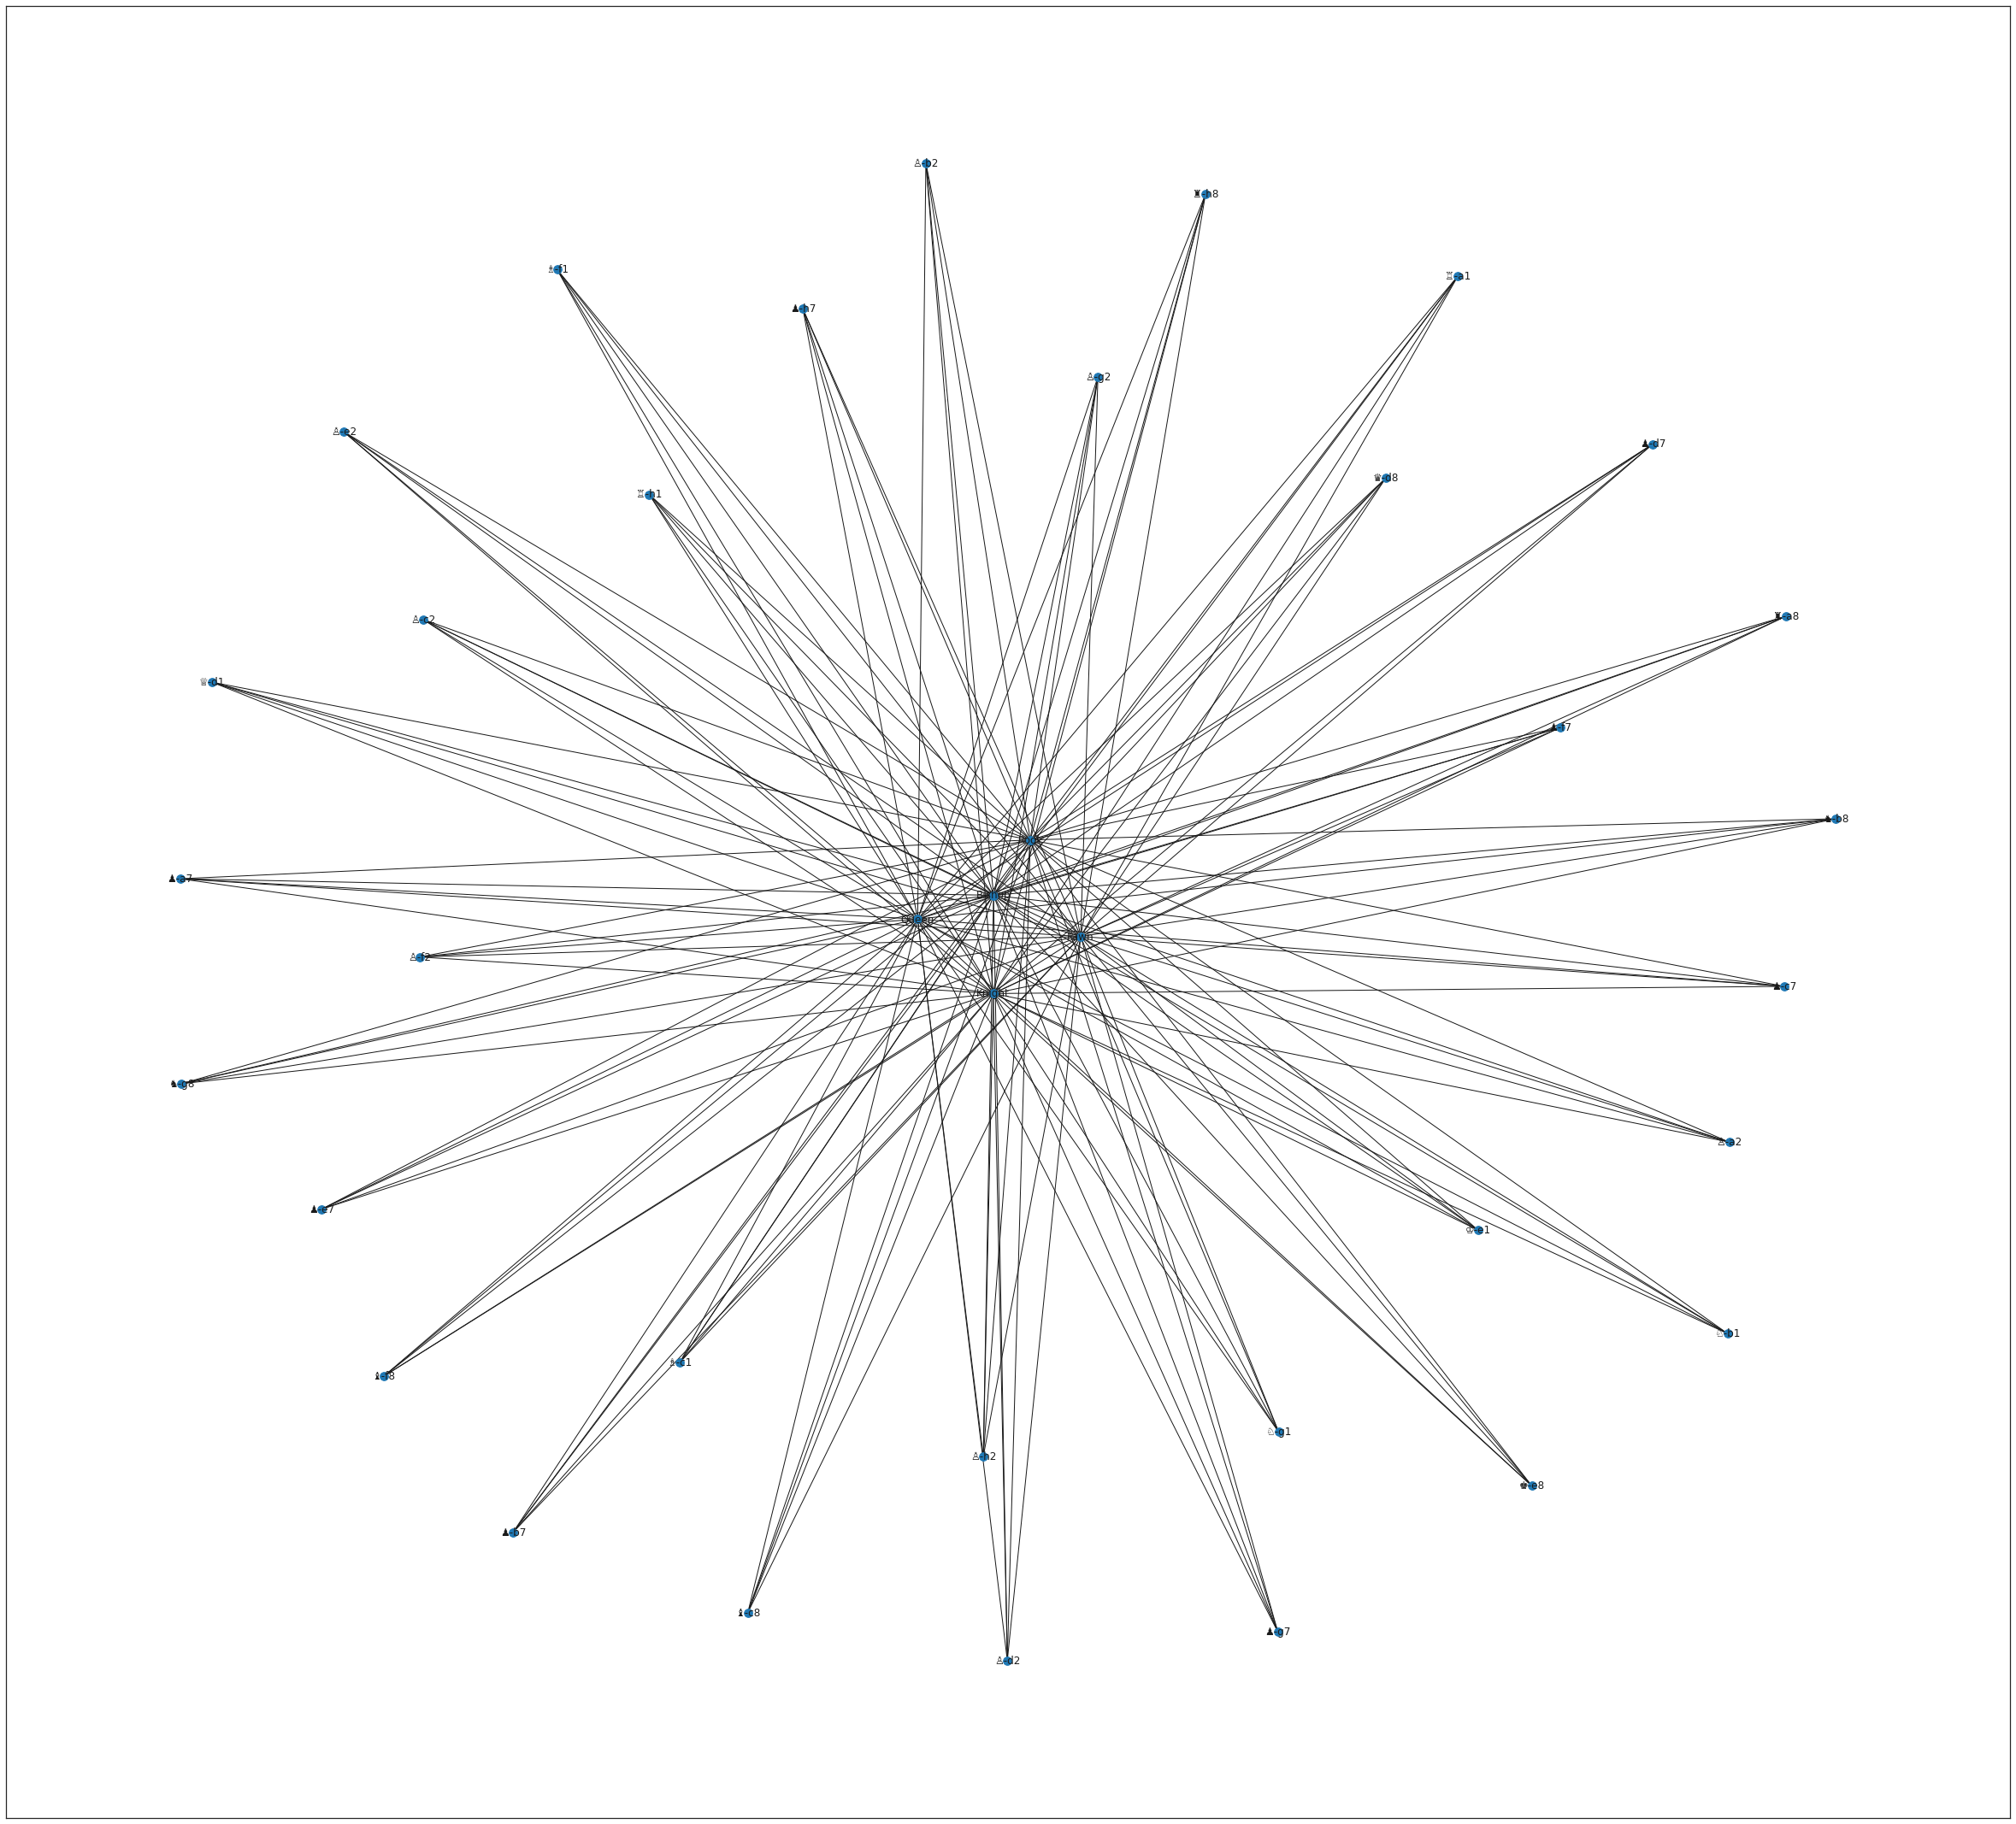

In [ ]:
g_tr = nx.Graph()
g_tr = nx.from_pandas_edgelist(captures_df_trun, source = 'piece', target = 'capture_name')
print(nx.info(g_tr))
plt.figure(figsize = (42,39))
nx.draw_networkx(g_tr, with_labels=True, node_size = 94)
plt.show()

Graph with 37 nodes and 160 edges

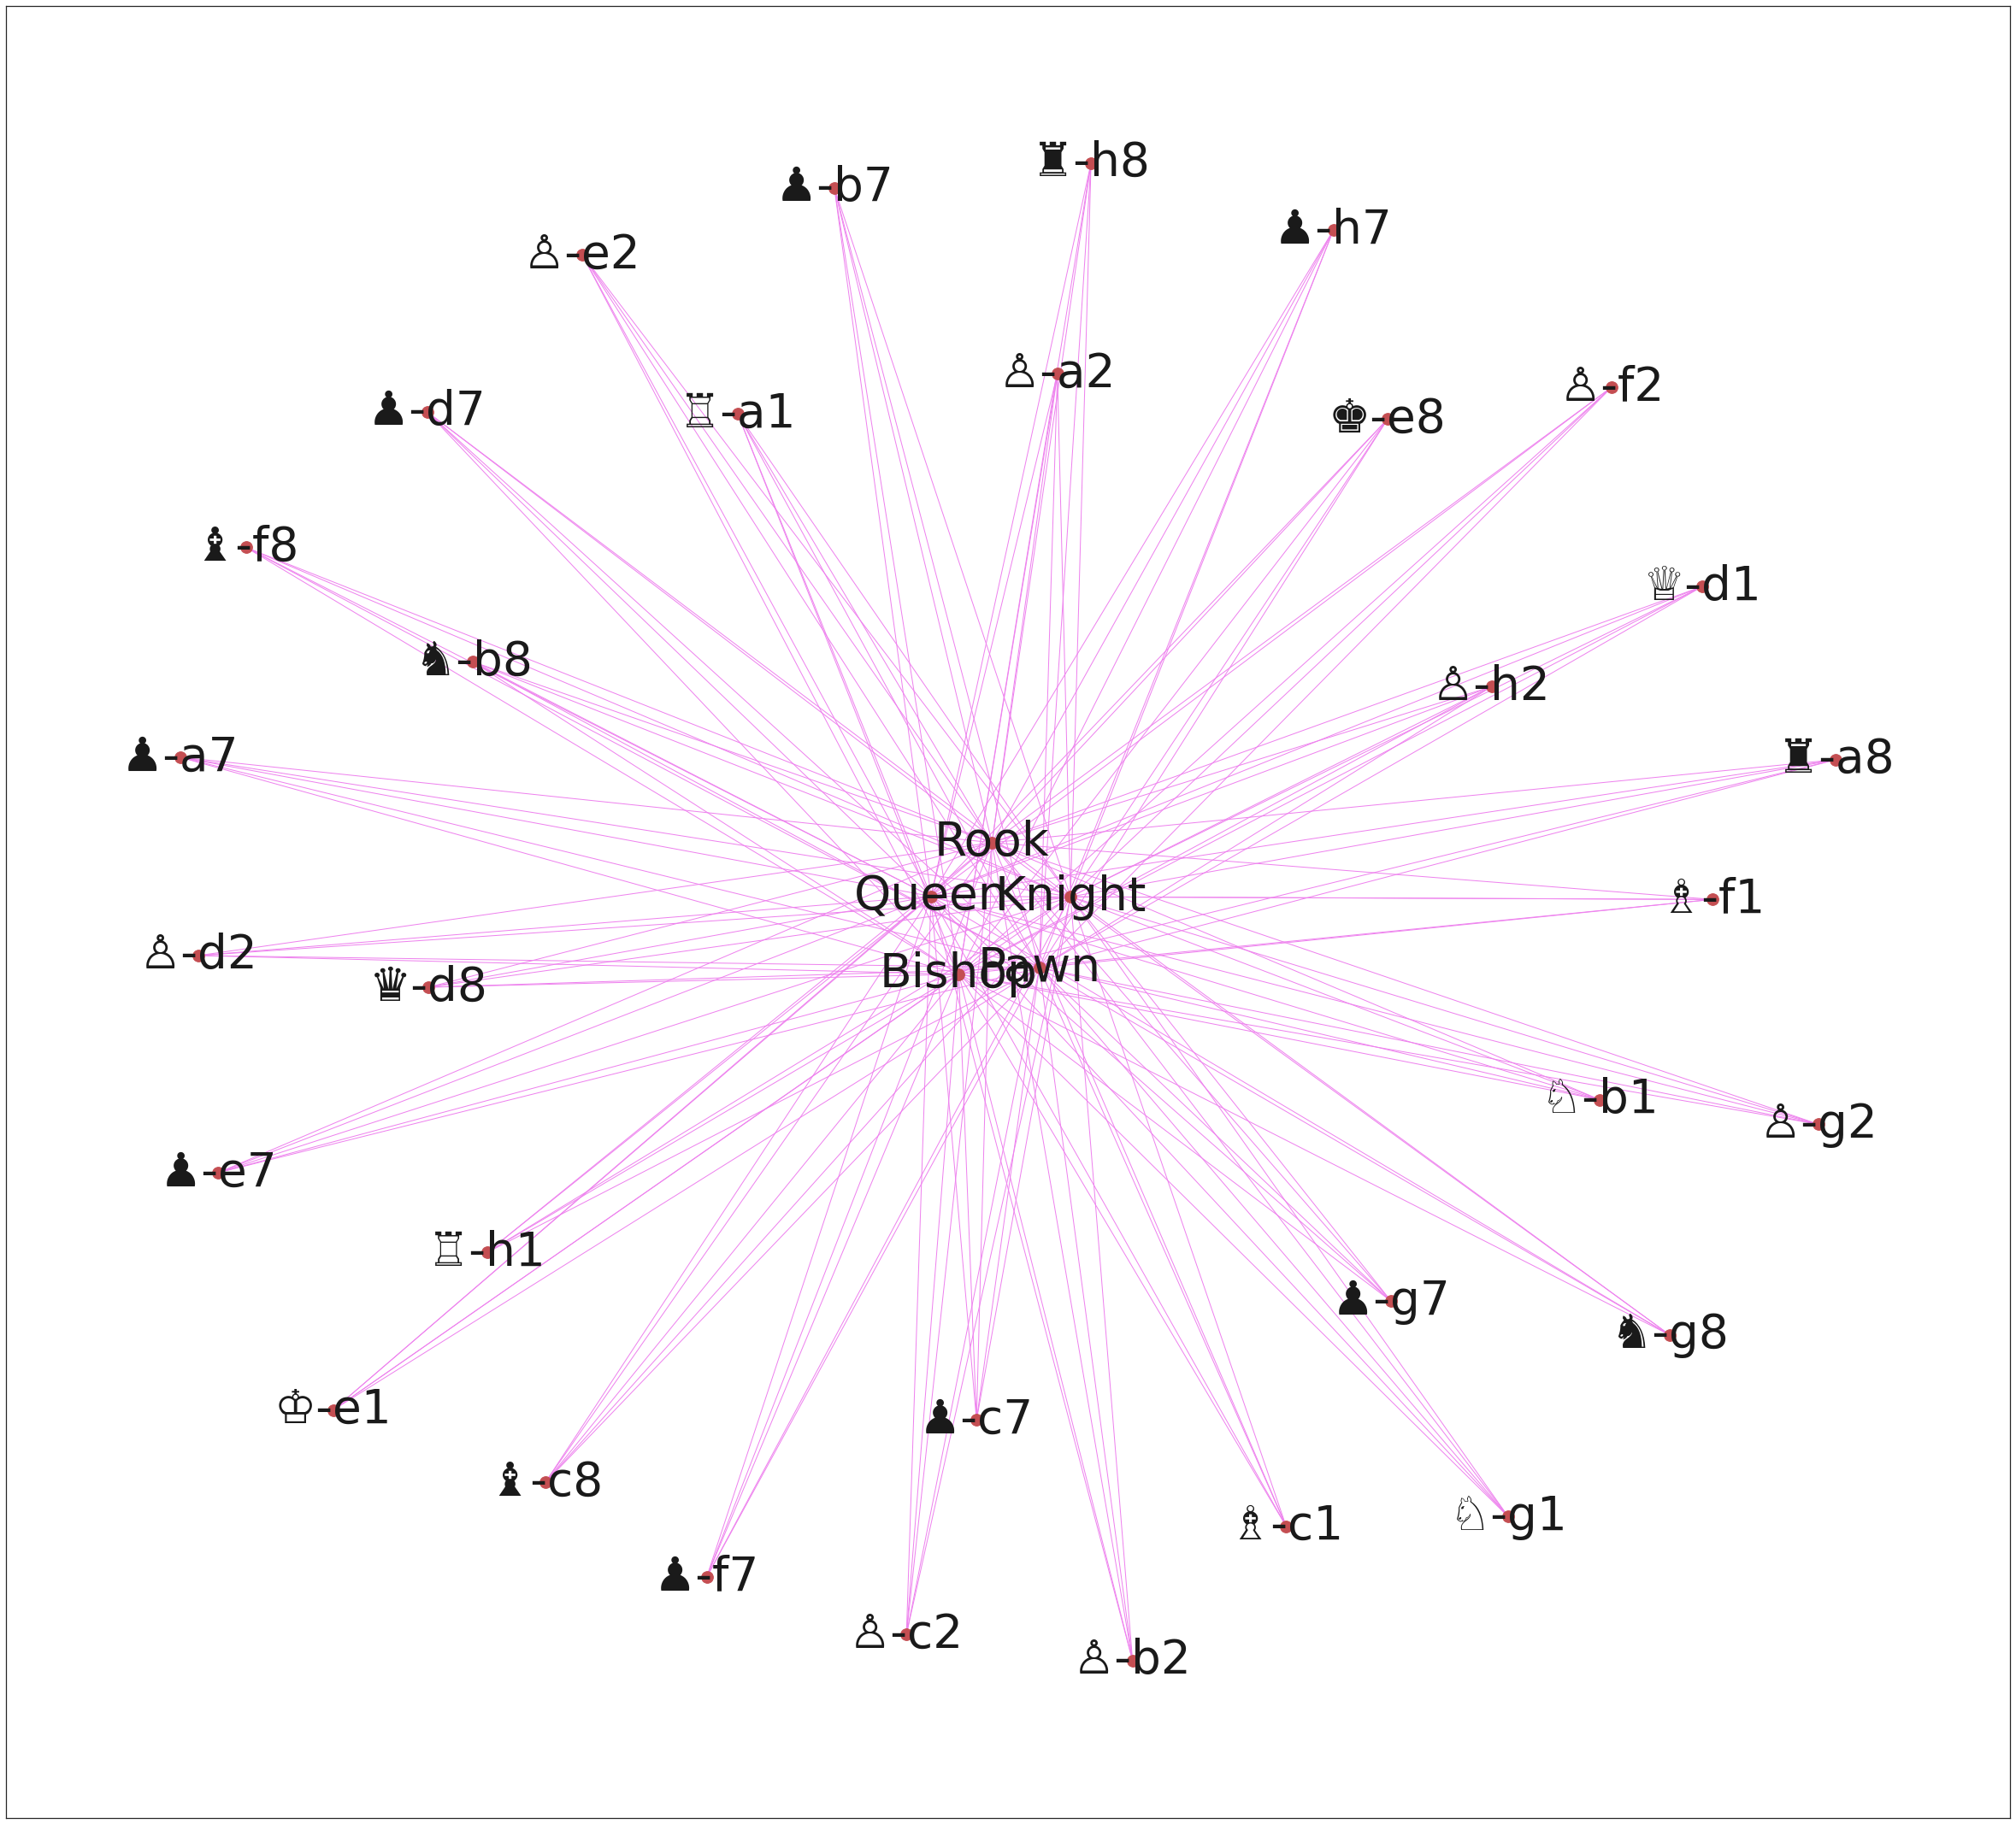

In [ ]:
g_tr = nx.Graph()
g_tr = nx.from_pandas_edgelist(captures_df_trun, source = 'piece', target = 'capture_name')
print(nx.info(g_tr))
plt.figure(figsize = (42,39))
nx.draw_networkx(g_tr,with_labels=True, node_size = 188, cmap = 'plasma', node_color = 'r', edge_color = 'violet', edge_cmap = 'plasma', font_size =55)
plt.show()

In [ ]:
plt.figure(figsize = (42,39))
nx.draw_networkx(g_tr, pos=nx.circular_layout(g_tr), with_labels=True, node_size = 180, cmap = 'plasma', node_color = 'gold', edge_color = 'purple', edge_cmap = 'plasma', font_size =35)
plt.show()

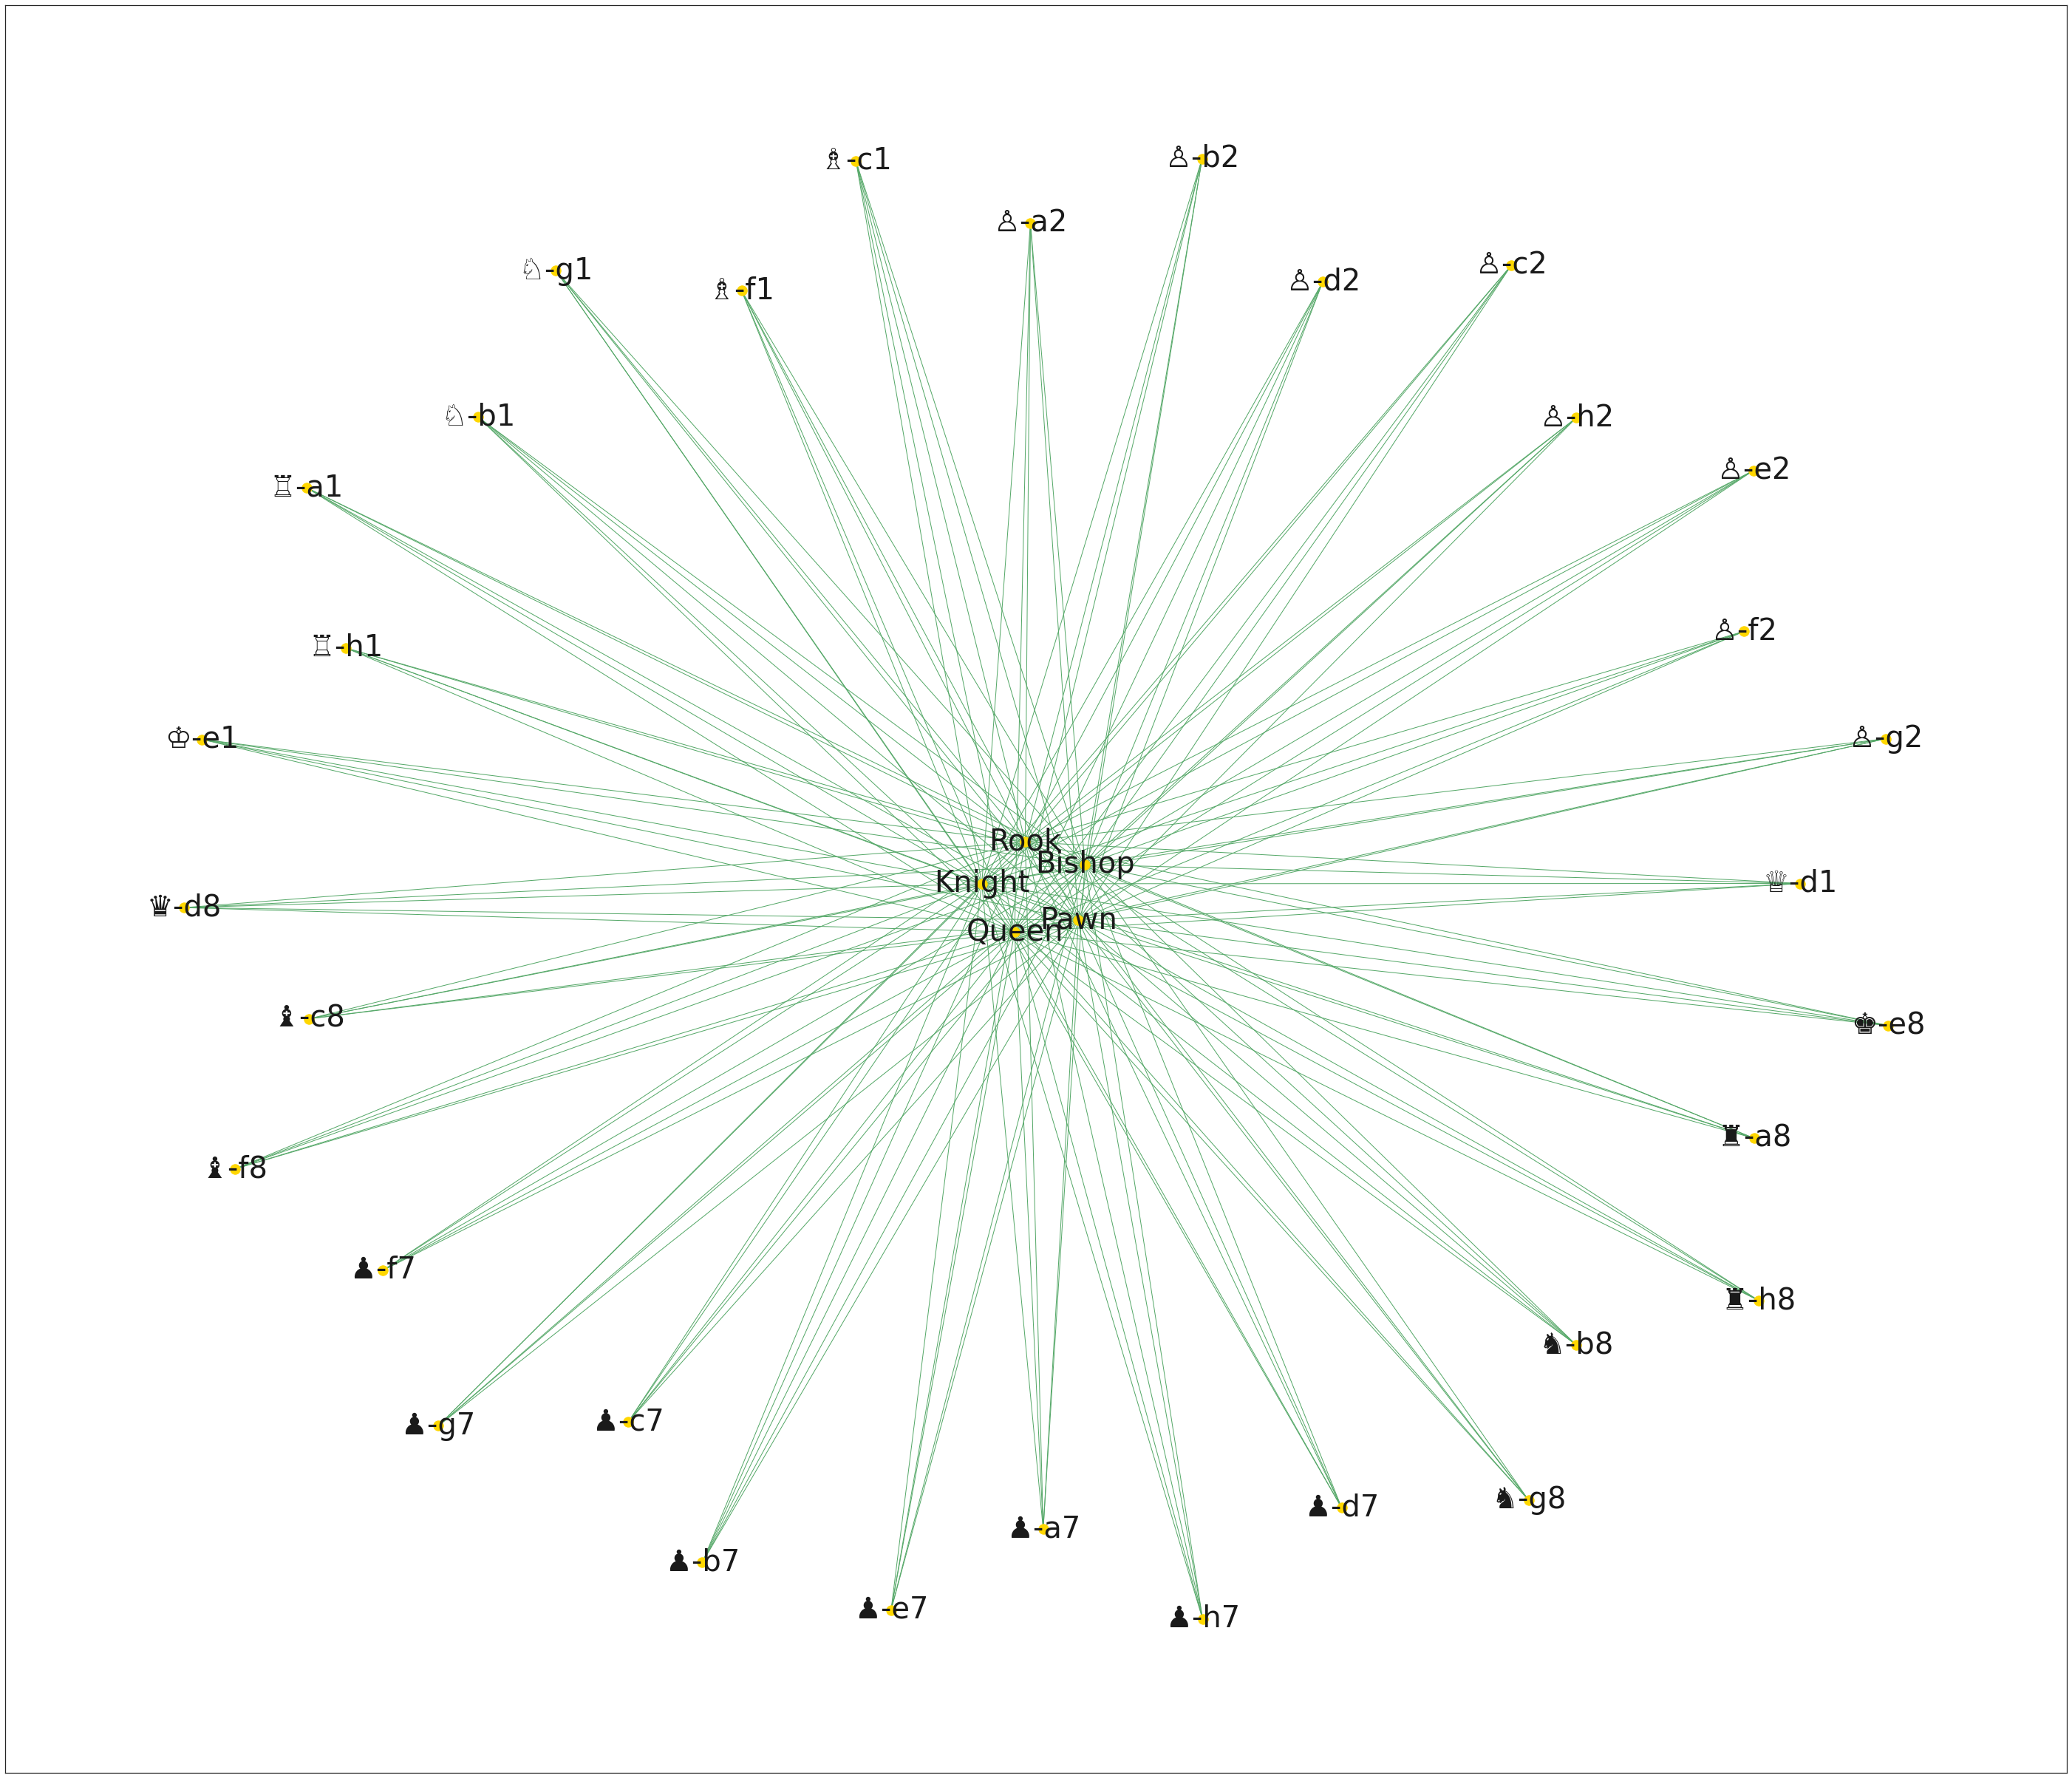

In [ ]:
plt.figure(figsize = (50,44))
nx.draw_networkx(g_tr, pos=nx.kamada_kawai_layout(g_tr), with_labels=True, node_size = 180, cmap = 'plasma', node_color = 'gold', edge_color = 'g', edge_cmap = 'plasma', font_size =40)
plt.show()

In [ ]:
centralMeasures_tr = pd.DataFrame(nx.degree_centrality(g_tr),index=[0]).T
centralMeasures_tr.columns=['Degree Centrality']
centralMeasures_tr['Page Rank']= pd.DataFrame(nx.pagerank(g_tr),index=[0]).T
centralMeasures_tr['Name']= centralMeasures_tr.index.tolist()
centralMeasures_tr.index = np.arange(0,len(centralMeasures_tr))
centralMeasures_tr

Degree Centrality  Page Rank    Name
0            0.138889   0.016550    ♕-d1
1            0.888889   0.094082   Queen
2            0.138889   0.016550    ♙-g2
3            0.138889   0.016550    ♙-f2
4            0.138889   0.016550    ♙-e2
5            0.138889   0.016550    ♙-h2
6            0.138889   0.016550    ♙-c2
7            0.138889   0.016550    ♙-d2
8            0.138889   0.016550    ♙-b2
9            0.138889   0.016550    ♙-a2
10           0.138889   0.016550    ♗-c1
11           0.138889   0.016550    ♗-f1
12           0.138889   0.016550    ♘-g1
13           0.138889   0.016550    ♘-b1
14           0.138889   0.016550    ♖-a1
15           0.138889   0.016550    ♖-h1
16           0.138889   0.016550    ♔-e1
17           0.888889   0.094082  Bishop
18           0.888889   0.094082  Knight
19           0.888889   0.094082    Pawn
20           0.138889   0.016550    ♛-d8
21           0.138889   0.016550    ♝-c8
22           0.138889   0.016550    ♝-f8
23           0.138889   0.016550    ♟-f7
24           0.138889   0.016550    ♟-g7
25           0.138889   0.016550    ♟-c7
26           0.138889   0.016550    ♟-b7
27           0.138889   0.016550    ♟-e7
28           0.138889   0.016550    ♟-a7
29           0.138889   0.016550    ♟-h7
30           0.138889   0.016550    ♟-d7
31           0.138889   0.016550    ♞-g8
32           0.138889   0.016550    ♞-b8
33           0.138889   0.016550    ♜-h8
34           0.138889   0.016550    ♜-a8
35           0.138889   0.016550    ♚-e8
36           0.888889   0.094082    Rook

In [ ]:
g__se = nx.Graph()
g__se = nx.from_pandas_edgelist(captures_df_trun, source = 'piece_name', target = 'capture_name')
print(nx.info(g__se))


Graph with 6 nodes and 20 edges

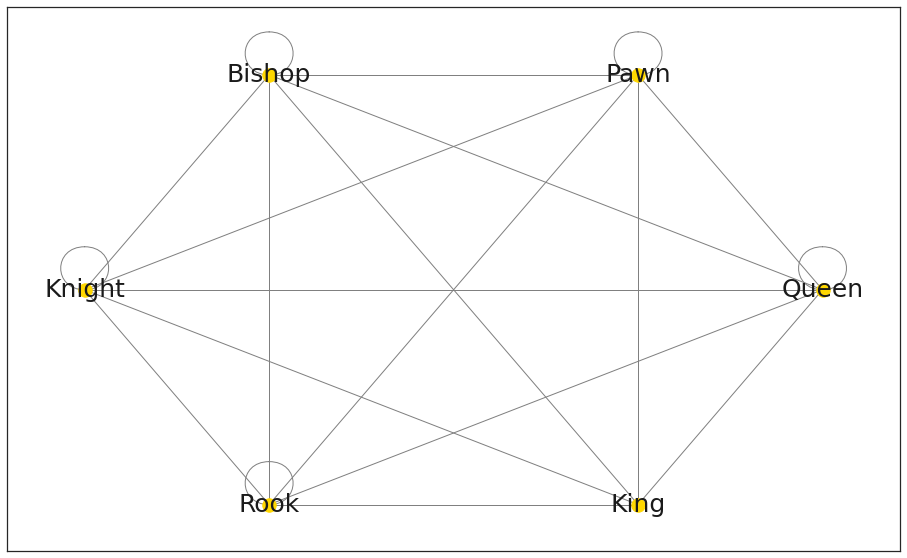

In [ ]:
plt.figure(figsize = (16,10))
nx.draw_networkx(g__se, pos=nx.circular_layout(g__se), with_labels=True, node_size = 180, cmap = 'plasma', node_color = 'gold', edge_color = 'gray', edge_cmap = 'plasma', font_size =25)
plt.show()

In [ ]:
centralMeasures__se = pd.DataFrame(nx.degree_centrality(g__se),index=[0]).T
centralMeasures__se.columns=['Degree Centrality']
centralMeasures__se['Page Rank']= pd.DataFrame(nx.pagerank(g__se),index=[0]).T
centralMeasures__se['piece type']= centralMeasures__se.index.tolist()
centralMeasures__se.index = np.arange(0,len(centralMeasures__se))
centralMeasures__se

Degree Centrality  Page Rank piece type
0                1.4   0.170803      Queen
1                1.4   0.170803       Pawn
2                1.4   0.170803     Bishop
3                1.4   0.170803     Knight
4                1.4   0.170803       Rook
5                1.0   0.145986       King